<a href="https://colab.research.google.com/github/zhe0503/mini-project-5logo-classification/blob/master/5logo_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


sample_data


In [4]:
#upload dataset
from google.colab import files

uploaded = files.upload()


Saving dataset.zip to dataset.zip


In [0]:
import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), "r")
zf.extractall()


In [6]:
!ls


dataset  dataset.zip  sample_data


In [0]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = './dataset/train'
validation_data_dir = './dataset/test'
nb_train_samples = 40392
nb_validation_samples = 13464
epochs = 10
batch_size = 512


In [33]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5)) # we have 5 class
model.add(Activation('softmax')) #Softmax

model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') 

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') 

#train the model
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)



Found 40392 images belonging to 5 classes.
Found 13464 images belonging to 5 classes.
Epoch 1/10
78/78 [==============================] - 190s 2s/step - loss: 1.0669 - acc: 0.5964 - val_loss: 0.4289 - val_acc: 0.8646
Epoch 2/10
78/78 [==============================] - 181s 2s/step - loss: 0.5010 - acc: 0.8256 - val_loss: 0.2766 - val_acc: 0.9074
Epoch 3/10
78/78 [==============================] - 184s 2s/step - loss: 0.3440 - acc: 0.8807 - val_loss: 0.2712 - val_acc: 0.9036
Epoch 4/10
78/78 [==============================] - 183s 2s/step - loss: 0.2618 - acc: 0.9090 - val_loss: 0.1117 - val_acc: 0.9594
Epoch 5/10
78/78 [==============================] - 182s 2s/step - loss: 0.2011 - acc: 0.9293 - val_loss: 0.1061 - val_acc: 0.9578
Epoch 6/10
78/78 [==============================] - 182s 2s/step - loss: 0.1818 - acc: 0.9378 - val_loss: 0.0715 - val_acc: 0.9775
Epoch 7/10
78/78 [==============================] - 183s 2s/step - loss: 0.1427 - acc: 0.9495 - val_loss: 0.0751 - val_acc: 0.97

In [76]:
#Test the model by using test set
score=model.evaluate_generator(
    validation_generator,
    steps=nb_validation_samples // batch_size)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03759453911190465
Test accuracy: 0.987415071031501


In [79]:
#upload the test picture
from google.colab import files

uploaded = files.upload()


In [64]:
# show the corresponding number of each class
print(validation_generator.class_indices)

{'Adidas': 0, 'Apple': 1, 'BMW': 2, 'Citroen': 3, 'Cocacola': 4}


In [52]:
import numpy as np
import scipy
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg


[3]


the predict result is: [0]


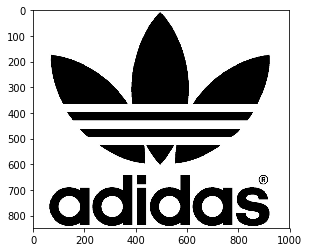

In [59]:
#the reslut of each picture
p1= mpimg.imread('01.jpg')
plt.imshow(p1)

img = image.load_img('01.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

predictions=model.predict_classes(x)

print('the predict result is:',predictions)


the predict result is: [1]


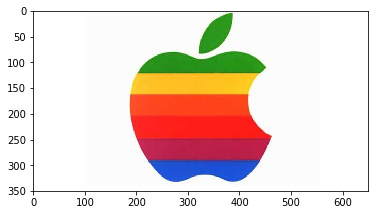

In [71]:
p1= mpimg.imread('08.jpg')
plt.imshow(p1)

img = image.load_img('08.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

predictions=model.predict_classes(x)

print('the predict result is:',predictions)

the predict result is: [2]


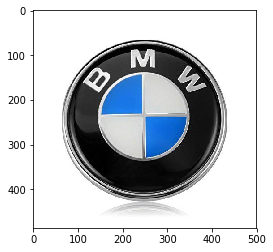

In [61]:
p1= mpimg.imread('03.jpg')
plt.imshow(p1)

img = image.load_img('03.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

predictions=model.predict_classes(x)

print('the predict result is:',predictions)

the predict result is: [3]


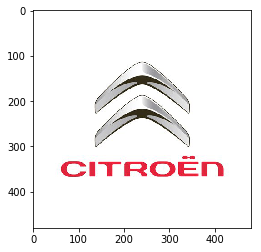

In [62]:
p1= mpimg.imread('04.jpg')
plt.imshow(p1)

img = image.load_img('04.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

predictions=model.predict_classes(x)

print('the predict result is:',predictions)

the predict result is: [4]


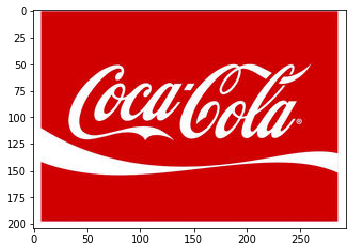

In [67]:
p1= mpimg.imread('07.jpg')
plt.imshow(p1)

img = image.load_img('07.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

predictions=model.predict_classes(x)

print('the predict result is:',predictions)